PRECIOUS ABANGIRA NIMMUSIIMA <br>
B28326<br>
B24B23/028 <br>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np

In [3]:
# relaoded the csv with a emicolon as the separator
data = pd.read_csv("Students.csv", sep=';')
print(data.head())


   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

In [4]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


a. What is the probability of a student being a "Graduate" under the variable "Target"? [20 MARKS]


In [ ]:
#printing columns to look for erros
print(data.columns)

#here I realized the columns were packed together so i went back to relaod the dataset with a separator in order for my notebook to be able to read the csv file well. 

In [17]:
total_students = len(data)
graduates = data[data["Target"] == "Graduate"]
prob_graduate = len(graduates) / total_students

print(f"Probability of being a Graduate: {prob_graduate:.2f}")


Probability of being a Graduate: 0.50


b. What is the probability of a student being a "Dropout" with a "Marital status" of 1?

In [20]:
marital_status_1 = data[data["Marital status"] == 1]

dropout_with_marital_1 = marital_status_1[marital_status_1["Target"] == "Dropout"]
prob_dropout_marital_1 = len(dropout_with_marital_1) / len(marital_status_1)

print(f"Probability of a student being a dropout with Marital status of 1: {prob_dropout_marital_1:.2f}")


Probability of a student being a dropout with Marital status of 1: 0.30


c. What is the relationship between the variables "Target" and "Mother's qualification?"

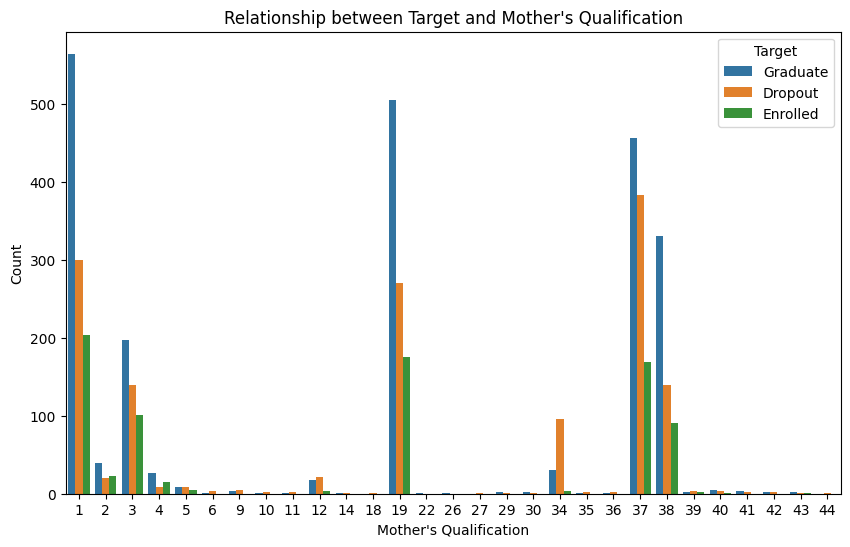

Chi-Square Test Statistic: 217.95213055737847
P-value: 5.8e-21
Cramér's V: 0.15694880104029407
Interpretation: The relationship between mother's qualification and student outcomes is significant (p < 0.05).
Interpretation of Cramér's V: 0.15694880104029407 indicates a moderate association.


In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Mother's qualification", hue="Target")
plt.title("Relationship between Target and Mother's Qualification")
plt.xlabel("Mother's Qualification")
plt.ylabel("Count")
plt.show()

# 4. Chi-Square Test of Independence
contingency_table = pd.crosstab(data["Target"], data["Mother's qualification"])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
formatted_p_value = f"{p:.2g}"  # Format the p-value
print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-value: {formatted_p_value}")

# 5. Calculate Cramér's V
n = contingency_table.sum().sum()  # Total sample size
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
print(f"Cramér's V: {cramers_v}")

# Interpretation of results
threshold = 0.05
if p < threshold:
    result_significance = "significant"
else:
    result_significance = "not significant"

print(f"Interpretation: The relationship between mother's qualification and student outcomes is {result_significance} (p < {threshold}).")

# Interpretation of Cramér's V:
if cramers_v < 0.1:
    strength = "weak association"
elif cramers_v < 0.3:
    strength = "moderate association"
else:
    strength = "strong association"

print(f"Interpretation of Cramér's V: {cramers_v} indicates a {strength}.")

The results show that a student’s outcome, such as graduating or dropping out, is statistically linked to their mother’s education level. The Chi-Square test gives a high value (217.95) with an extremely low p-value (0.05), which confirms that this connection is significant. However, the Cramér's V value (0.157) indicates that the strength of this relationship is weak. In simple terms, while a mother’s education level does influence student outcomes, it’s a relatively minor factor on its own and not a strong predictor.